In [1]:
import torch
import torchaudio
from random import randint
from IPython.display import Audio
from helpers.path_utils import get_base_dir
from helpers.audio_utils import trim_audio, resample_audio, standard_scale
from helpers.plot import compare_audios, plot_wavelet_spectrogram, plot_audio_fft

In [2]:
base_dir = get_base_dir()
HEARTBEATS_FILE_NAME = "000-20240910-1753.pt"
heartbeats_dir = base_dir.joinpath("data", "model", "original", HEARTBEATS_FILE_NAME)

mobile, stethos, heartbeats_sample_rate = torch.load(heartbeats_dir)
mobile.shape, stethos.shape, heartbeats_sample_rate

(torch.Size([1, 456800]), torch.Size([1, 456800]), 4000)

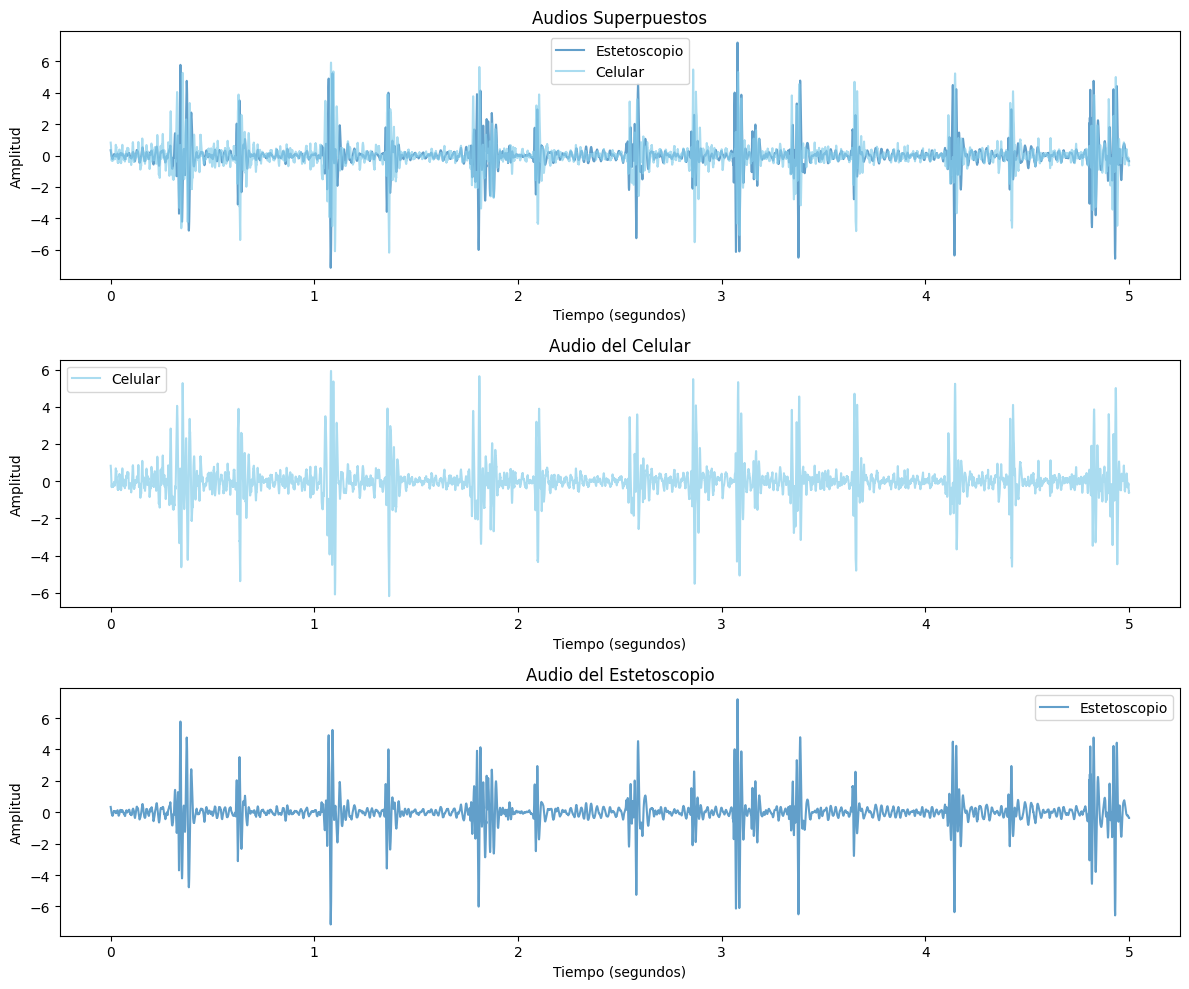

: 

In [4]:
START_AT = 3
END_AT = START_AT + 5

mobile_snippet = trim_audio(mobile, heartbeats_sample_rate, START_AT, END_AT)
stethos_snippet = trim_audio(stethos, heartbeats_sample_rate, START_AT, END_AT)

mobile_snippet = standard_scale(mobile_snippet)
stethos_snippet = standard_scale(stethos_snippet)

compare_audios(
    mobile_snippet.squeeze(),
    stethos_snippet.squeeze(),
    heartbeats_sample_rate,
)

In [16]:
noise_dir = base_dir.joinpath("data", "hospital-ambient-noise", "original")
noises = list(noise_dir.glob("*.wav"))

total_noises = len(noises)
total_noises, noises[:3]

(562,
 [WindowsPath('C:/Users/efrai/OneDrive/Desktop/EF/Education/MCC_UAG/Tesis/coratech/data/hospital-ambient-noise/original/seg_1.wav'),
  WindowsPath('C:/Users/efrai/OneDrive/Desktop/EF/Education/MCC_UAG/Tesis/coratech/data/hospital-ambient-noise/original/seg_10.wav'),
  WindowsPath('C:/Users/efrai/OneDrive/Desktop/EF/Education/MCC_UAG/Tesis/coratech/data/hospital-ambient-noise/original/seg_100.wav')])

In [17]:
choosen_one = randint(0, total_noises)
print(f"#{choosen_one + 1} / {total_noises}")

noise, noise_sample_rate = torchaudio.load(str(noises[choosen_one]))
print(f"Noise sample rate: {noise_sample_rate}")

#412 / 562
Noise sample rate: 44100


New noise sample rate: 4000


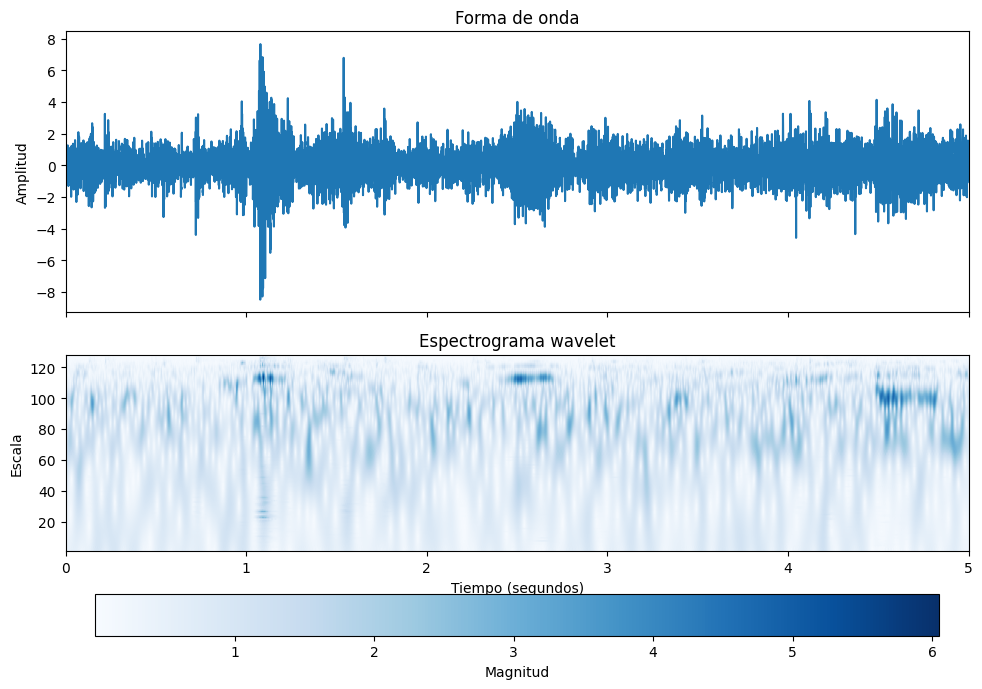

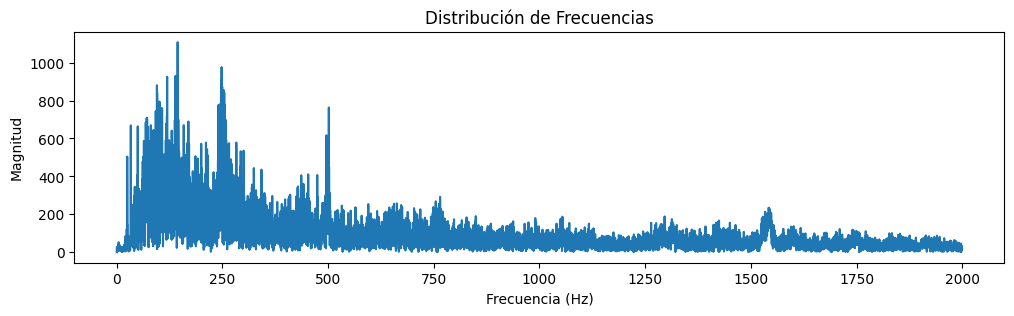

In [18]:
noise, noise_sample_rate = resample_audio(
    noise, noise_sample_rate, heartbeats_sample_rate
)
noise = standard_scale(noise)
print(f"New noise sample rate: {noise_sample_rate}")

plot_wavelet_spectrogram(noise.numpy(), noise_sample_rate, downsample_factor=1)
plot_audio_fft(noise.numpy(), noise_sample_rate)
Audio(noise, rate=noise_sample_rate, autoplay=True)

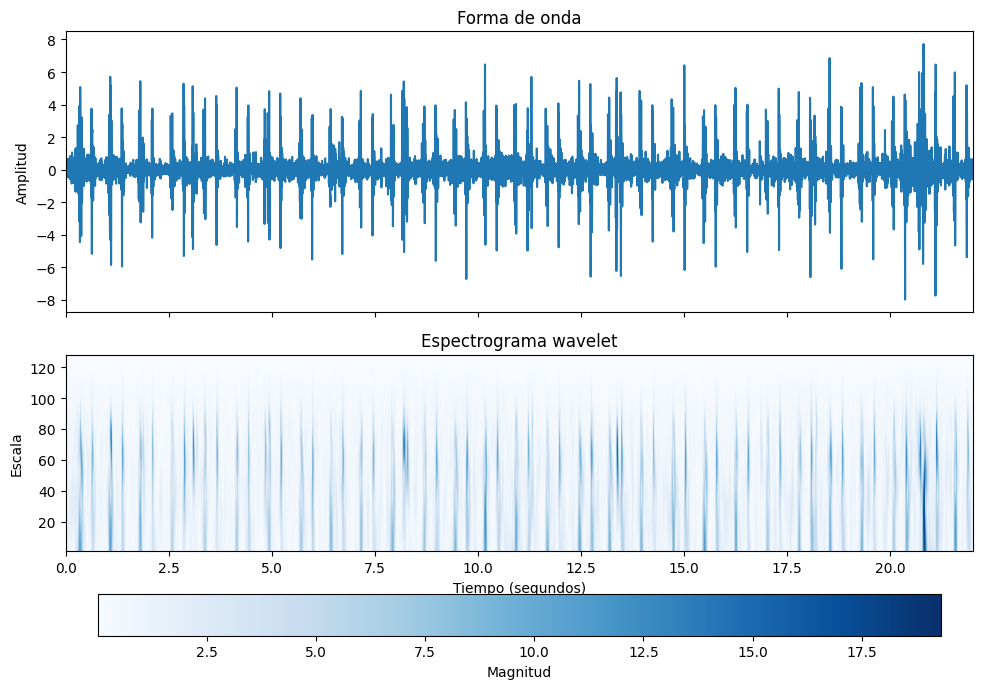

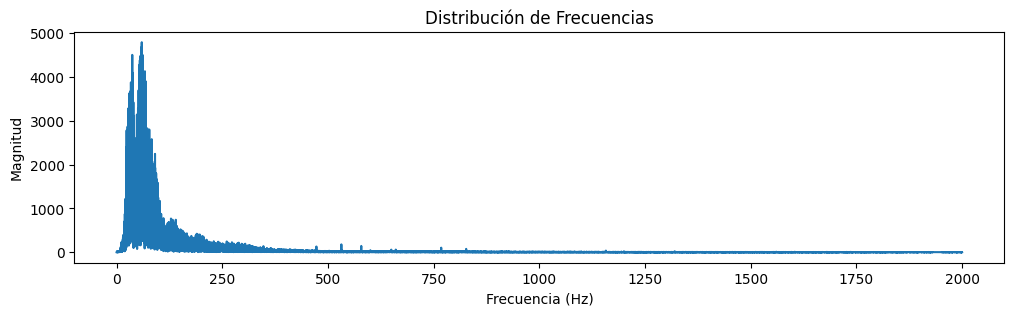

In [19]:
plot_wavelet_spectrogram(
    mobile_snippet.numpy(), heartbeats_sample_rate, downsample_factor=1
)
plot_audio_fft(mobile_snippet.numpy(), heartbeats_sample_rate)
Audio(mobile_snippet, rate=heartbeats_sample_rate, autoplay=True)

In [20]:
repeat_factor = mobile_snippet.shape[-1] // noise.shape[-1] + 1
repeated_noise = noise.repeat(1, repeat_factor)[:, : mobile_snippet.shape[-1]]

mobile_snippet.shape, noise.shape, repeated_noise.shape

(torch.Size([1, 88000]), torch.Size([1, 20000]), torch.Size([1, 88000]))

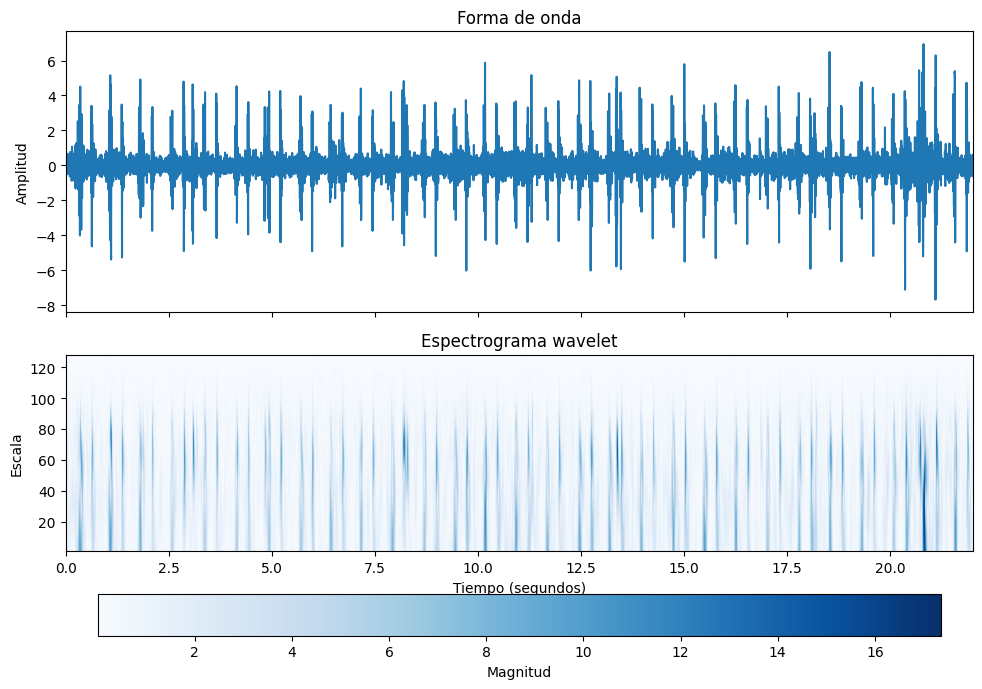

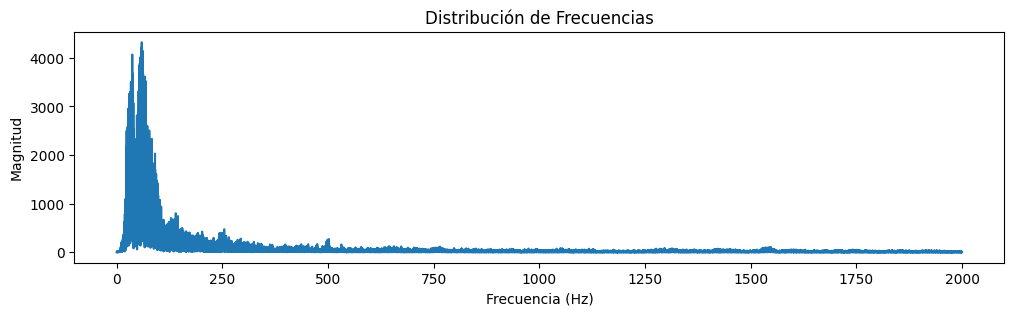

In [22]:
NOISE_VOL = 0.1

mobile_snippet_noisy = repeated_noise * NOISE_VOL + mobile_snippet * (1 - NOISE_VOL)

plot_wavelet_spectrogram(
    mobile_snippet_noisy.numpy(), heartbeats_sample_rate, downsample_factor=1
)
plot_audio_fft(mobile_snippet_noisy.numpy(), heartbeats_sample_rate)
Audio(mobile_snippet_noisy, rate=heartbeats_sample_rate, autoplay=True)